In [1]:
import pandas as pd
import numpy as np

In [2]:
df_test = pd.read_csv("/Users/anthonyivanier/Desktop/Ensae/3A/Advanced Machine Learning/Projet CNN/archive/sign_mnist_test/sign_mnist_test.csv")
df_train = pd.read_csv("/Users/anthonyivanier/Desktop/Ensae/3A/Advanced Machine Learning/Projet CNN/archive/sign_mnist_train/sign_mnist_train.csv")

In [3]:
train_label=df_train['label']
train_label.head()
trainset=df_train.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [4]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [5]:
test_label=df_test['label']
X_test=df_test.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

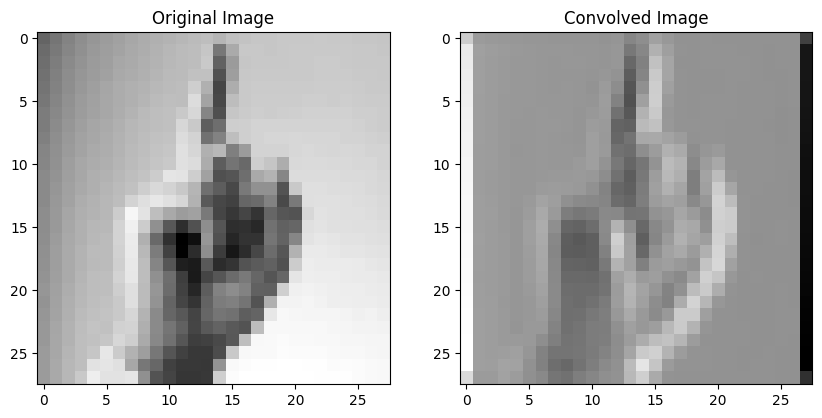

In [12]:
def convolution(image, kernel):
    return convolve2d(image, kernel, mode='same')


image = X_train[0].reshape(28, 28)  
kernel = kernel.reshape(3, 3)  


kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])


convolved_image = convolution(image, kernel)


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(convolved_image, cmap='gray')
axs[1].set_title('Convolved Image')
plt.show()


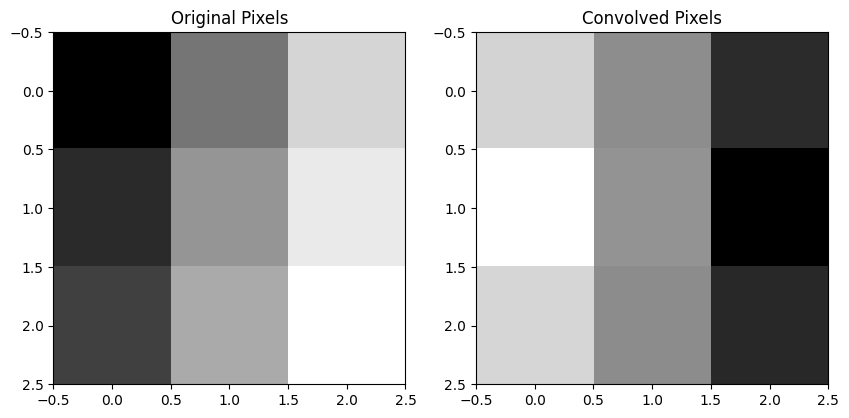

In [30]:

image = X_train[0].reshape(28, 28)  
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])  


pixels = image[:3, :3]


convolved_pixels = convolution(pixels, kernel)


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(pixels, cmap='gray')
axs[0].set_title('Original Pixels')
axs[1].imshow(convolved_pixels, cmap='gray')
axs[1].set_title('Convolved Pixels')
plt.show()


In [22]:

def relu(image):
    return np.maximum(0, image)


relu_convolved_image = relu(convolved_image)


axs[0].imshow(convolved_image, cmap='gray')
axs[0].set_title('Convolved Image (Pre-ReLU)')
axs[1].imshow(relu_convolved_image, cmap='gray')
axs[1].set_title('Convolved Image (Post-ReLU)')
plt.show()


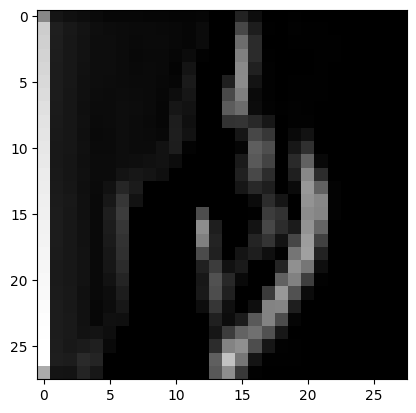

In [28]:
plt.imshow(relu_convolved_image, cmap='gray')

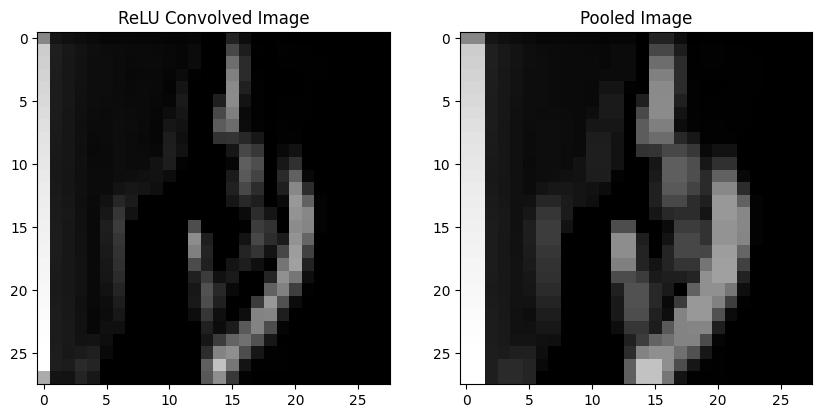

[[239 239  38  30  24  18  14  14  13  12  11  10  12  12   0  61  61  23
    1   3   3   1   1   0   0   0   0   0]
 [362 362  56  44  35  26  22  21  18  18  17  15  21  21   0 126 126  52
    2   4   4   2   2   1   0   0   0   0]
 [369 369  56  44  35  26  23  21  18  18  18  15  21  21   0 193 193  76
    2   4   4   2   2   2   0   0   0   0]
 [374 374  53  42  33  24  24  21  18  18  18  20  20  20   0 226 226  76
    3   3   3   3   3   3   0   0   0   0]
 [379 379  52  42  32  24  24  21  18  18  17  36  36   5   0 244 244  76
    4   1   1   3   3   3   0   0   0   0]
 [384 384  51  42  31  24  23  21  19  19  17  46  46   0  56 247 247  57
    4   2   3   3   3   1   0   0   0   0]
 [390 390  50  41  30  24  22  22  21  19  24  46  46   0 130 247 247  34
    5   3   3   3   3   0   0   0   0   0]
 [396 396  50  40  29  22  24  24  22  19  40  40  40   0 163 225 225  22
    7   4   4   3   2   0   0   0   0   0]
 [401 401  49  39  29  21  24  24  22  18  52  52  32   0 163 19

In [29]:
from scipy.ndimage import maximum_filter

def pooling(image, pool_size):
    return maximum_filter(image, size=pool_size)


pooled_image = pooling(relu_convolved_image, pool_size=(2, 2))


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(relu_convolved_image, cmap='gray')
axs[0].set_title('ReLU Convolved Image')
axs[1].imshow(pooled_image, cmap='gray')
axs[1].set_title('Pooled Image')
plt.show()


print(pooled_image)


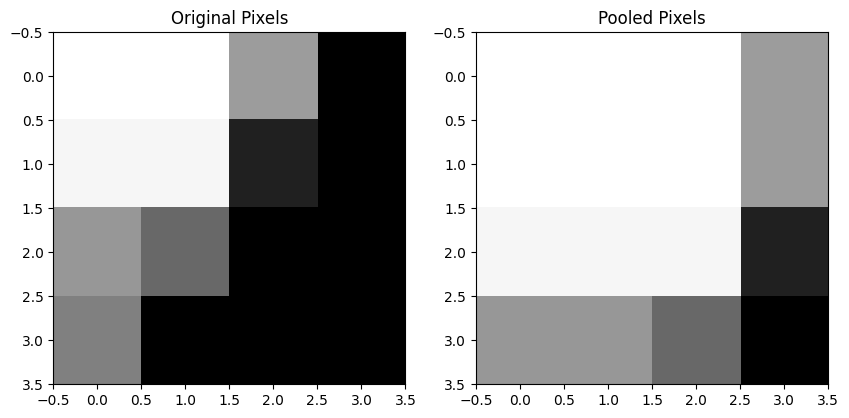

In [33]:
interesting_pixels = pooled_image[10:14, 10:14]


pooled_interesting_pixels = pooling(interesting_pixels, pool_size=(2, 2))


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(interesting_pixels, cmap='gray')
axs[0].set_title('Original Pixels')
axs[1].imshow(pooled_interesting_pixels, cmap='gray')
axs[1].set_title('Pooled Pixels')
plt.show()


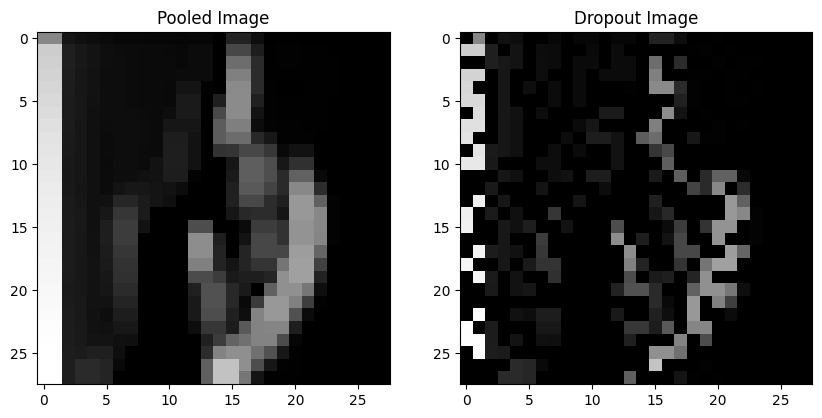

In [34]:

def dropout(image, dropout_rate):
    mask = np.random.binomial(1, 1 - dropout_rate, size=image.shape)
    return image * mask


dropout_rate = 0.5
dropout_image = dropout(pooled_image, dropout_rate)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(pooled_image, cmap='gray')
axs[0].set_title('Pooled Image')
axs[1].imshow(dropout_image, cmap='gray')
axs[1].set_title('Dropout Image')
plt.show()


In [38]:
def flatten(image):
    return image.reshape(-1)


flattened_image = flatten(dropout_image)

print(flattened_image.shape)


(784,)
